<a href="https://colab.research.google.com/github/Vishal-Upendran/Machine-Learning-Tutorials/blob/main/ML_tutorial_AdityaL1_2022_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine and deep learning for solar flare prediction.

This notebook is written as a part of the Machine learning session at the Second Aditya-L1 workshop at Manipal Academy of Higher Education (MAHE) at Manipal, Udupi, Karnataka from 28th Nov 2022 to 30 Nov 2022. 

This notebook is intended to provide an introduction on using Support Vector Machine and Neural Network to classify an Active Region dataset into Flaring or Non-Flaring classes. 

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Dataset reference:

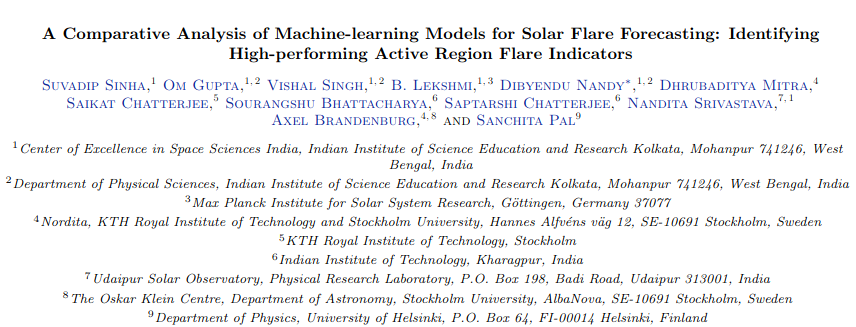


Thanks to Suvadip for putting together this dataset in an easily accessible manner!

Arxiv: https://arxiv.org/pdf/2204.05910.pdf

Data: https://zenodo.org/record/5498348


Parameters in this dataset:

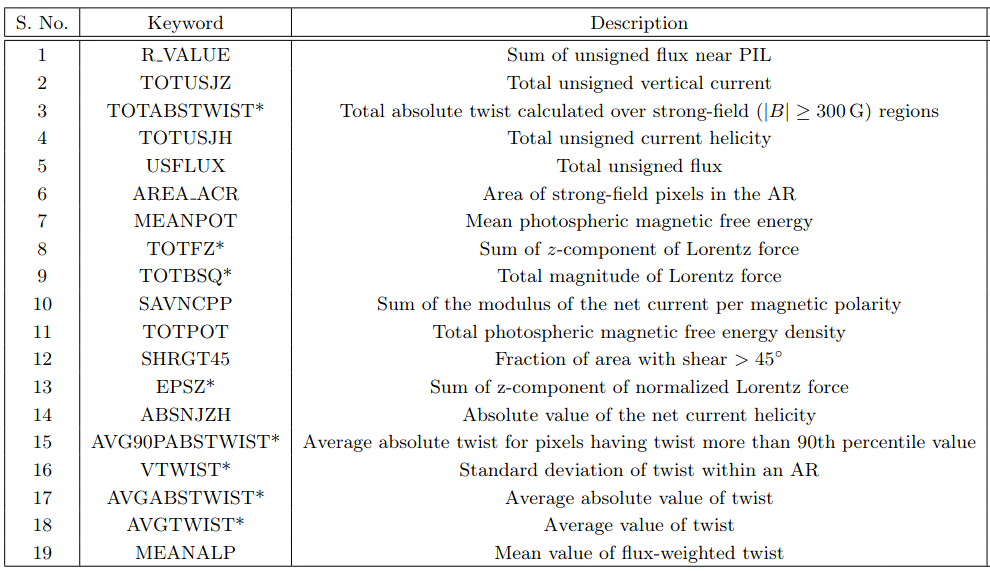

In [ ]:
!wget -O active_region_dataset.csv https://zenodo.org/record/5498348/files/active_region_dataset.csv?download=1 

In [44]:
data = pd.read_csv("active_region_dataset.csv")

In [45]:
data

,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,MEANPOT,R_VALUE,SHRGT45,EPSZ,TOTBSQ,TOTFZ,TOTABSTWIST,AR_class
0,720.336,7.265489e+22,1.337285e+13,240.634,9.859024e+12,5.987544e+21,171.006271,5501.074,4.072,25.269,-0.368702,5.229537e+09,-1018.852566,1216.566630,1.0
1,942.902,2.245220e+23,1.954248e+13,142.551,2.124900e+12,1.628014e+22,470.634491,6295.134,3.818,19.619,-0.306630,1.444087e+10,-2339.814306,2342.365915,1.0
2,855.488,7.395334e+22,1.864853e+13,10.009,7.092123e+12,1.104408e+22,703.612671,2971.182,3.707,12.117,-0.454164,7.179322e+09,-1722.934567,2389.672059,1.0
3,536.272,6.688043e+22,1.016615e+13,35.038,1.490940e+12,1.017101e+22,240.660339,3373.081,3.782,11.460,-0.548612,7.219961e+09,-2093.018031,1178.799959,1.0
4,497.171,6.762531e+22,1.110523e+13,15.378,1.266448e+12,5.466512e+21,302.568970,5202.920,3.473,34.474,-0.282554,5.323466e+09,-794.820713,984.158818,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,514.691,1.414809e+23,1.127137e+13,15.674,1.009762e+12,7.122627e+21,458.674316,9601.052,3.185,41.817,-0.180162,8.238414e+09,-784.296253,1038.109156,0.0
3857,14.729,7.936683e+20,3.525319e+11,0.396,2.646952e+10,2.442653e+20,22.799706,1436.591,0.000,5.769,-0.669738,1.117296e+08,-39.540871,53.874604,0.0
3858,29.649,1.734539e+21,5.980711e+11,8.892,5.069508e+11,4.573043e+20,28.232023,2006.275,0.000,2.611,-0.700536,2.423016e+08,-89.693210,101.052762,0.0
3859,23.305,8.793581e+20,5.057706e+11,1.761,1.338955e+11,3.290048e+20,65.527550,1268.478,0.000,0.192,-0.628337,1.608371e+08,-53.401298,89.879493,0.0


In [46]:
X_in,y_out = data.values[:,:-1],data.values[:,-1]
print(X_in.shape,y_out.shape)

(3861, 14) (3861,)


In [47]:
columns = data.columns

In [48]:
columns,len(columns)

(Index(['TOTUSJH', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX',
        'AREA_ACR', 'MEANPOT', 'R_VALUE', 'SHRGT45', 'EPSZ', 'TOTBSQ', 'TOTFZ',
        'TOTABSTWIST', 'AR_class'],
       dtype='object'), 15)

## Visualizing the distribution of data

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 24), sharex=False, sharey=False)
axes = axes.ravel()    
for  i,col in enumerate(columns[:-1]):
    sns.histplot(data=data, x=col, ax=axes[i],hue="AR_class")
    axes[i].set_ylim([0,axes[i].get_ylim()[-1]])

### Step - 1: Split the data into a training and testing dataset.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.3, random_state=9000)

### Step - 2: Preprocess the data by normalization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.transform(X_test)

# Support Vector classification

We now classify the flare dataset using Support vector machines!

### Step - 3: Define the classifier model and train it

In [52]:
from sklearn.svm import SVC

In [77]:
classifier = SVC(probability=True)
classifier.fit(x_train_norm, y_train)

SVC(probability=True)

In [78]:
y_test_predict = classifier.predict(x_test_norm)

### Step - 4: Evaluate the model

In [53]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve

In [54]:
def metric_summary(ytrue,ypred):
    print(f"Accuracy = {accuracy_score(ytrue,ypred)}")
    print(f"F1 score = {f1_score(ytrue,ypred)}")
    print(f"ROC AUC score = {roc_auc_score(ytrue,ypred)}")

In [79]:
metric_summary(y_test,y_test_predict)

Accuracy = 0.99137187230371
F1 score = 0.9673202614379085
ROC AUC score = 0.9759253309343272


In [80]:
# Plot precision-recall curve
y_test_predict_prob = classifier.predict_proba(x_test_norm)
precision, recall, thresholds = roc_curve(y_test,y_test_predict_prob[:,1])

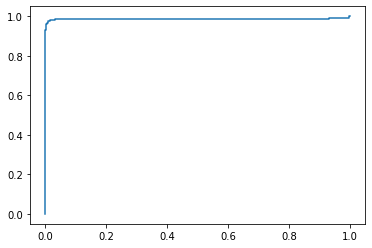

In [81]:
plt.plot(precision,recall)

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

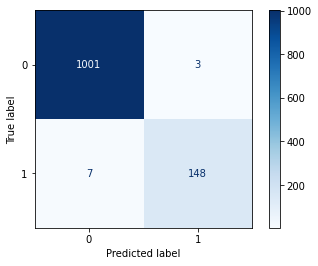

In [82]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_predict)).plot(cmap='Blues')

# Neural network classification

We now classify the flare dataset using a simple neural network!

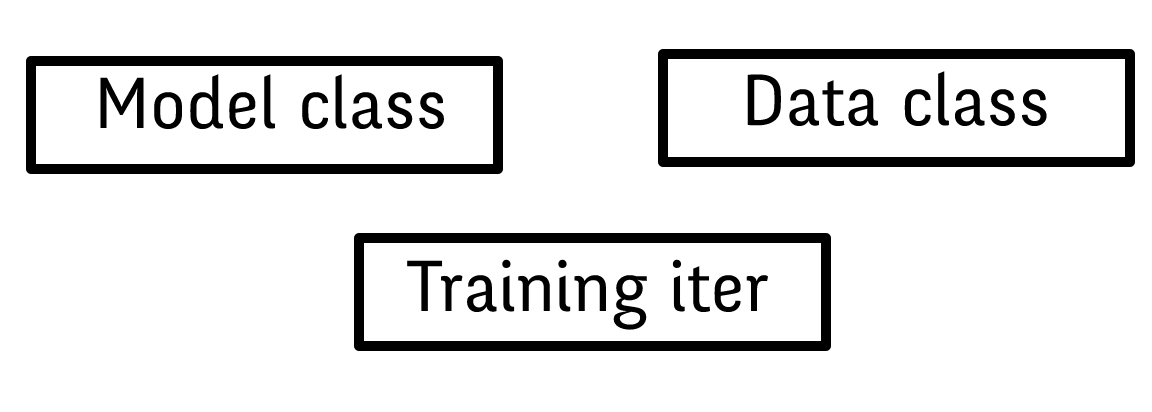

In [56]:
import torch
import torch.nn as nn
from torch.utils import data
from tqdm import tqdm

In [57]:
def _float(tensor):
    return torch.Tensor(tensor.astype(np.float32)).float()
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


## Defining the model

In [58]:
class FlareDNN(nn.Module):
    def __init__(self,nin,nout):
        super(FlareDNN,self).__init__()
        self.NN = nn.Sequential(
                    nn.Linear(nin,9),
                    nn.ReLU(inplace=True),
                    nn.Linear(9,3),
                    nn.ReLU(inplace=True),
                    nn.Linear(3,nout),
                    nn.Sigmoid()
        )
    def forward(self,input_data):
        return self.NN(input_data)

## Defining the data class

In [59]:
class Data(data.Dataset):
    def __init__(self,features,target):
        self.features = _float(features).to(device)
        self.target = torch.Tensor(target.astype(np.int_)).to(device)
        self.nout = target.shape[-1]
        self.nin = features.shape[-1]
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self,index):
        return self.features[index],self.target[index]

## Define hyperparameters

In [65]:
batch_size = 100
lr = 1e-4
num_epochs = 1000
loss_fn = nn.BCELoss()

In [66]:
train_set = Data(x_train_norm,y_train.reshape([-1,1]))
test_set = Data(x_test_norm,y_test.reshape([-1,1]))

training_loader = data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
test_loader = data.DataLoader(test_set,batch_size=test_set.features.shape[0],shuffle=True)

In [67]:
#This defines our model
Flare_model = FlareDNN(train_set.nin,train_set.nout)
Flare_model = Flare_model.to(device).float()
print(Flare_model)

FlareDNN(
  (NN): Sequential(
    (0): Linear(in_features=14, out_features=9, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=9, out_features=3, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=3, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [68]:
optimizer = torch.optim.Adam(Flare_model.parameters(),lr=lr)

## Training loop

In [69]:
training_stats = []
testing_stats = []
for i in tqdm(np.arange(num_epochs)):
    ce_loss = []
    for features,target in training_loader:
        optimizer.zero_grad()

        predictions = Flare_model(features)

        loss = loss_fn(predictions,target)
        
        loss.backward()
        optimizer.step()

        ce_loss.append(loss.detach().cpu().numpy())
    training_stats.append(np.mean(ce_loss))
    with torch.no_grad():
        ce_loss = []
        for features,target in test_loader:

            predictions = Flare_model(features)

            loss = loss_fn(predictions,target)
            ce_loss.append(loss.detach().cpu().numpy())
        
        testing_stats.append(np.mean(ce_loss))
    if i%100==0:
        print(f"Training loss: {training_stats[-1]}")
        print(f"Testing loss: {testing_stats[-1]}")

  0%|          | 4/1000 [00:00<01:05, 15.15it/s]

Training loss: 0.7940950393676758
Testing loss: 0.7953189611434937


 10%|█         | 104/1000 [00:08<00:58, 15.26it/s]

Training loss: 0.11288202553987503
Testing loss: 0.1146499514579773


 20%|██        | 204/1000 [00:14<00:51, 15.33it/s]

Training loss: 0.04505286365747452
Testing loss: 0.04400664567947388


 30%|███       | 304/1000 [00:21<00:45, 15.33it/s]

Training loss: 0.03673219680786133
Testing loss: 0.03468702733516693


 40%|████      | 404/1000 [00:28<00:38, 15.42it/s]

Training loss: 0.034447137266397476
Testing loss: 0.03371443226933479


 50%|█████     | 504/1000 [00:34<00:32, 15.47it/s]

Training loss: 0.03634277731180191
Testing loss: 0.03361888602375984


 60%|██████    | 603/1000 [00:42<00:27, 14.68it/s]

Training loss: 0.03209851309657097
Testing loss: 0.033425793051719666


 70%|███████   | 703/1000 [00:48<00:19, 15.52it/s]

Training loss: 0.03134189173579216
Testing loss: 0.0339377261698246


 80%|████████  | 804/1000 [00:56<00:20,  9.78it/s]

Training loss: 0.031026188284158707
Testing loss: 0.03405259549617767


 90%|█████████ | 904/1000 [01:03<00:06, 15.08it/s]

Training loss: 0.02994528040289879
Testing loss: 0.03420091047883034


100%|██████████| 1000/1000 [01:09<00:00, 14.32it/s]


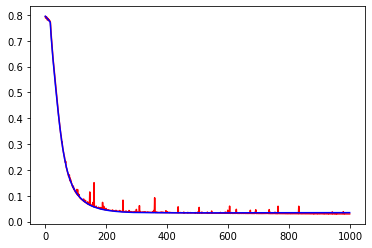

In [70]:
plt.plot(training_stats,'r')
plt.plot(testing_stats,'b')

## Perform predictions

In [71]:
def prob_to_out(probs,thresh):
    outs = np.ones_like(probs)
    outs[np.where(probs<thresh)] = 0.0
    return outs

In [73]:
xtmp,_ = train_set[:]
ytrain_pred_probs = Flare_model(xtmp.to(device)).detach().cpu().numpy()
ytrain_pred_nn = prob_to_out(ytrain_pred_probs,0.5)

xtmp,_ = test_set[:]
ytest_pred_probs = Flare_model(xtmp.to(device)).detach().cpu().numpy()
ytest_pred_nn = prob_to_out(ytest_pred_probs,0.5)


## Performance check!

In [74]:
metric_summary(y_test,ytest_pred_nn)

Accuracy = 0.9879206212251941
F1 score = 0.9554140127388535
ROC AUC score = 0.9793888960287881


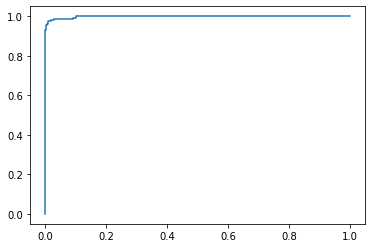

In [75]:
precision, recall, thresholds = roc_curve(y_test,ytest_pred_probs[:,0])
plt.plot(precision,recall)

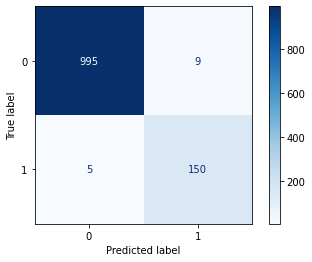

In [76]:
ConfusionMatrixDisplay(confusion_matrix(y_test, ytest_pred_nn)).plot(cmap='Blues')